# NNTI Assignment 6

Name 1: Sayeh Jarollahi<br>
Student id 1: 7073520<br>
Email 1: saja00006@stud.uni-saarland.de<br>

Name 2: Mahsa Amani<br>
Student id 2: 7064006 <br>
Email 2: maam00002@stud.uni-saarland.de <br>

Name 3: <br>
Student id 3:  <br>
Email 3: <br>

**Instructions:**
- Read each question carefully. <br/>
- Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook. <br>
- Upload the zipped folder on CMS. Please follow the naming convention of **Name1_id1_Name2_id2_Name3_id3.zip**. Only one member of the group should make the submisssion.

## Batch Normalization
In this exercise you will again construct a feed forward neural network, however you will use batch normalization during training. Training deep neural networks can be challenging due to the change in the distribution of inputs to layers deep in the network as a result of the updates of the weights in the previous layers. This causes the learning to chase a "moving target", which slows down the learning process. Batch normalization is a technique that aims to address this problem by normalizing layer inputs. This stabilizes the learning process and can greatly decrease training time. If you are interested you can read the paper introducing batch normalization [here](https://arxiv.org/abs/1502.03167).

You will be working with the [FashionMNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html) dataset by Zalando, which consists of $28\times 28$ black and white images and has 10 classes just like the [MNIST](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html) dataset. But instead of numbers the classes are various items of clothing such as shoes, t-shirts, dresses, etc.

### 1. Baseline Network (1 point)
You are provided with a dataloader for the train and test sets, each with a batch size of 64. Your task is to construct a feed forward neural network with 3 hidden linear layers with a ReLU after each of the first 2 layers. The first layer should have a hidden size of 64 and the second a hidden size of 32. This is a multi-class classification problem so you will need to use cross entropy loss (provided by [nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)). Use a stochastic gradient descent (provided by [torch.optim.SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)) with a learning rate of 0.001 as the optimizer. Train your network on the training data for 5 epochs and report accuracy on the **test** set after each epoch, for this refer to [PyTorch Training Loop](https://pytorch.org/tutorials/beginner/introyt/trainingyt.html#the-training-loop) and [Per-Epoch Activity](https://pytorch.org/tutorials/beginner/introyt/trainingyt.html#per-epoch-activity). Make sure to save the accuracies.
(hint: the data comes in the format of $28 \times 28$ tensors, so you will need flatten it to train your network)

In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt

/Users/sayeh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# load train and test set
fashion_trainset = torchvision.datasets.FashionMNIST('data/', train=True, download=True, transform=transforms.ToTensor())
fashion_testset = torchvision.datasets.FashionMNIST('data/', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 12632062.14it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 1158954.49it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 10515494.96it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14932418.39it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
# get train and test loader
fashion_train_loader = torch.utils.data.DataLoader(dataset=fashion_trainset, batch_size=64, shuffle=True)
fashion_test_loader = torch.utils.data.DataLoader(dataset=fashion_testset, batch_size=64, shuffle=False)

In [13]:
import torch.optim as optim

class FashionNetwork(nn.Module):

    def __init__(self):
        # TODO
        # Fill in the layers provided by PyTorch that correspond to the description.
        # Define the loss function
        # Define the optimizer
        super(FashionNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(28*28, 64), 
            nn.ReLU(), 
            nn.Linear(64, 32), 
            nn.ReLU(), 
            nn.Linear(32, 10)
        )
        self.loss = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(self.parameters(), lr=0.001)

    def forward(self, x):
        return self.model(x)

    def optimize(self, fashion_train_loader, fashion_test_loader):
        accuracies = []
        for epoch in range(5):
            self.train()
            for batch in fashion_train_loader:
                inputs, labels = batch
                outputs = self(inputs)
                loss_value = self.loss(outputs, labels)
                self.optimizer.zero_grad()

                loss_value.backward()
                self.optimizer.step()
            accuracy = self.test(fashion_test_loader)
            accuracies.append(accuracy)   
            print(f"Epoch {epoch + 1}/{5}, Test Accuracy: {accuracy:.2f}%")
        return accuracies


    def test(self, fashion_test_loader):
        self.eval()  # Set the model to evaluation mode
        correct = 0
        total = 0
        
        with torch.no_grad():  # No gradients needed during testing
            for batch in fashion_test_loader:
                inputs, labels = batch
                outputs = self(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()        
        accuracy = 100 * correct / total
        return accuracy

In [15]:
fashion_network = FashionNetwork()
basic_accuracies = fashion_network.optimize(fashion_train_loader, fashion_test_loader)

Epoch 1/5, Test Accuracy: 15.85%
Epoch 2/5, Test Accuracy: 29.94%
Epoch 3/5, Test Accuracy: 31.61%
Epoch 4/5, Test Accuracy: 41.99%
Epoch 5/5, Test Accuracy: 61.71%


### 2. Network with Batch Normalization (0.5 points)
Construct another network with the same parameters as 2.1 but this time include a batch normalization layer (use [nn.BatchNorm1d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html)). Where to place this layer is up to you, but you can reference the lecture slides for inspiration. Again train your network for 5 epochs and report **test** accuracy after each epoch.

In [19]:
class FashionNetworkBatchNorm(nn.Module):

    def __init__(self):

        super(FashionNetworkBatchNorm, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(28*28, 64), 
            nn.ReLU(), 
            nn.Linear(64, 32), 
            nn.BatchNorm1d(32),
            nn.ReLU(), 
            nn.Linear(32, 10)
        )
        self.loss = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(self.parameters(), lr=0.001)

    
    def forward(self, x):
        return self.model(x)

    def optimize(self, fashion_train_loader, fashion_test_loader):
        accuracies = []
        for epoch in range(5):
            self.train()
            for batch in fashion_train_loader:
                inputs, labels = batch
                outputs = self(inputs)
                loss_value = self.loss(outputs, labels)
                self.optimizer.zero_grad()

                loss_value.backward()
                self.optimizer.step()
            accuracy = self.test(fashion_test_loader)
            accuracies.append(accuracy)   
            print(f"Epoch {epoch + 1}/{5}, Test Accuracy: {accuracy:.2f}%")
        return accuracies


    def test(self, fashion_test_loader):
        self.eval()  # Set the model to evaluation mode
        correct = 0
        total = 0
        
        with torch.no_grad():  # No gradients needed during testing
            for batch in fashion_test_loader:
                inputs, labels = batch
                outputs = self(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()        
        accuracy = 100 * correct / total
        return accuracy

In [20]:
fashion_network_batch_norm = FashionNetworkBatchNorm()
batch_norm_accuracies = fashion_network_batch_norm.optimize(fashion_train_loader, fashion_test_loader)

Epoch 1/5, Test Accuracy: 70.79%
Epoch 2/5, Test Accuracy: 76.65%
Epoch 3/5, Test Accuracy: 78.26%
Epoch 4/5, Test Accuracy: 79.35%
Epoch 5/5, Test Accuracy: 80.70%


### 3. Plotting the Performances (0.25 points)
Plot the accuracies of the 2 networks and **discuss what you observe**.

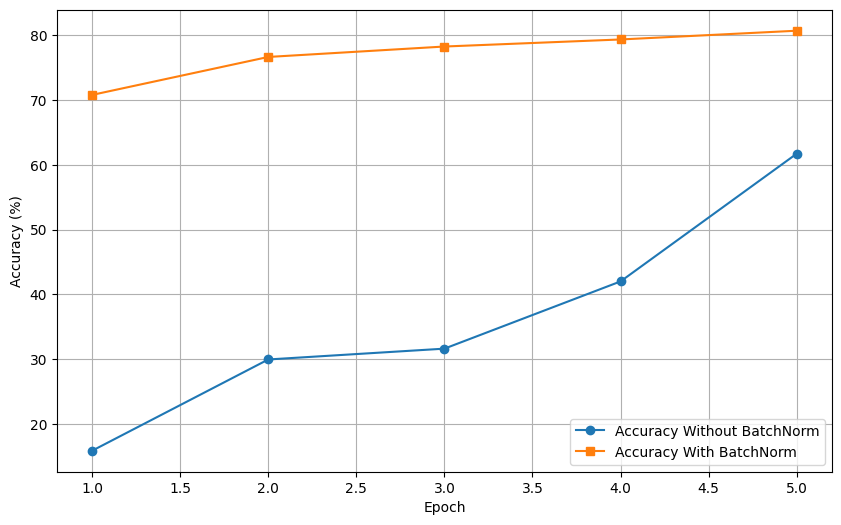

In [21]:
epochs = range(1, 6)

plt.figure(figsize=(10, 6))
plt.plot(epochs, basic_accuracies, label="Accuracy Without BatchNorm", marker='o')
plt.plot(epochs, batch_norm_accuracies, label="Accuracy With BatchNorm", marker='s')

plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()

**Your Answer:**
As we can see, the model with BatchNorm layer performs extremely better than the model without batchnorm. As we know, the batch normalization layer ensures stable input distributions for layers. In this context we have only one layer of batchnorm which ensures that the inputs to the next level are normalized and have mean 0 and std 1. This reduces the effects of internal covariate shift, where the distribution of inputs to layers changes as the model learns.

As the plot shows, the model with batch normalization outperforms the other model in all the epochs. It even starts with a higher accuracy. This is because batchNorm layer makes the effect of random initialization in the first step less. Without BatchNorm, the initial layers of a neural network might produce activations that are either too large or too small, making it difficult for the network to learn effectively at the beginning of training.